# Project Description

Temperature Forecast Project using ML

This project involves the development of machine learning models to predict next-day maximum and minimum air temperatures over Seoul, South Korea. The dataset used for this purpose is provided by the Korea Meteorological Administration and spans from 2013 to 2017, specifically focusing on summer data. The primary objective of this project is to correct any biases in the temperature forecasts generated by the LDAPS (Land Data Assimilation and Prediction System) model operated by the administration.

The goal is to build separate machine learning models that can effectively predict the minimum and maximum air temperatures for the next day based on the provided dataset. This project involves data preprocessing, feature engineering, model selection, training, and evaluation to ensure accurate temperature predictions.

In essence, this project aims to leverage machine learning techniques to enhance the accuracy of temperature forecasts, which can have significant implications for various industries and activities that rely on accurate weather predictions.

# Problem Statement

In this project, there are two distinct predictive modeling problems that need to be solved:

Regression Problem for Next-Day Maximum Temperature Prediction:
The first problem is a regression task. Given the dataset's attributes as inputs (features), the objective is to predict the next-day maximum air temperature (Next_Tmax) for Seoul, South Korea. Since the target variable (Next_Tmax) is a continuous numerical value, this is a regression problem. The goal is to build a regression model that can accurately predict the maximum temperature for the following day.

Regression Problem for Next-Day Minimum Temperature Prediction:
The second problem is also a regression task. Here, the aim is to predict the next-day minimum air temperature (Next_Tmin) using the same set of input features. Similar to the first problem, this involves developing a regression model that can predict the minimum temperature for the next day.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the data set

In [2]:
df = pd.read_csv('temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

The Data Contains 7752 Rows and 25 Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

## Dataset Overview

The dataset contains information about various environmental factors collected from different weather stations. It has a total of 7752 entries with 25 columns.

### Column Descriptions

1. **station**: The identification number of the weather station. There are 7750 non-null entries.
2. **Date**: The date of data collection. There are 7750 non-null entries.
3. **Present_Tmax**: The maximum temperature recorded at the present time. There are 7682 non-null entries.
4. **Present_Tmin**: The minimum temperature recorded at the present time. There are 7682 non-null entries.
5. **LDAPS_RHmin**: Relative humidity at the minimum temperature recorded using LDAPS (Land Data Assimilation System). There are 7677 non-null entries.
6. **LDAPS_RHmax**: Relative humidity at the maximum temperature recorded using LDAPS. There are 7677 non-null entries.
7. **LDAPS_Tmax_lapse**: Maximum temperature recorded using LDAPS with lapse rate. There are 7677 non-null entries.
8. **LDAPS_Tmin_lapse**: Minimum temperature recorded using LDAPS with lapse rate. There are 7677 non-null entries.
9. **LDAPS_WS**: Wind speed recorded using LDAPS. There are 7677 non-null entries.
10. **LDAPS_LH**: Latent heat flux recorded using LDAPS. There are 7677 non-null entries.
11. **LDAPS_CC1**: Fractional cloud cover at layer 1 recorded using LDAPS. There are 7677 non-null entries.
12. **LDAPS_CC2**: Fractional cloud cover at layer 2 recorded using LDAPS. There are 7677 non-null entries.
13. **LDAPS_CC3**: Fractional cloud cover at layer 3 recorded using LDAPS. There are 7677 non-null entries.
14. **LDAPS_CC4**: Fractional cloud cover at layer 4 recorded using LDAPS. There are 7677 non-null entries.
15. **LDAPS_PPT1**: Precipitation at layer 1 recorded using LDAPS. There are 7677 non-null entries.
16. **LDAPS_PPT2**: Precipitation at layer 2 recorded using LDAPS. There are 7677 non-null entries.
17. **LDAPS_PPT3**: Precipitation at layer 3 recorded using LDAPS. There are 7677 non-null entries.
18. **LDAPS_PPT4**: Precipitation at layer 4 recorded using LDAPS. There are 7677 non-null entries.
19. **lat**: Latitude of the station. There are 7752 non-null entries.
20. **lon**: Longitude of the station. There are 7752 non-null entries.
21. **DEM**: Digital Elevation Model at the station location. There are 7752 non-null entries.
22. **Slope**: Slope of the terrain at the station location. There are 7752 non-null entries.
23. **Solar radiation**: Amount of solar radiation at the station location. There are 7752 non-null entries.
24. **Next_Tmax**: The maximum temperature predicted for the next time step. There are 7725 non-null entries.
25. **Next_Tmin**: The minimum temperature predicted for the next time step. There are 7725 non-null entries.

### Data Quality

- There are missing values in columns such as Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, and others.
- Most columns have 7677 non-null entries, indicating some missing data points.

### Data Types

- The 'Date' column is of type 'object', which might need to be converted to a datetime format for better analysis.
- The rest of the columns are of type 'float64'.

### Checking for Null Values

In [9]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we can see the presence of Null Values

<Axes: >

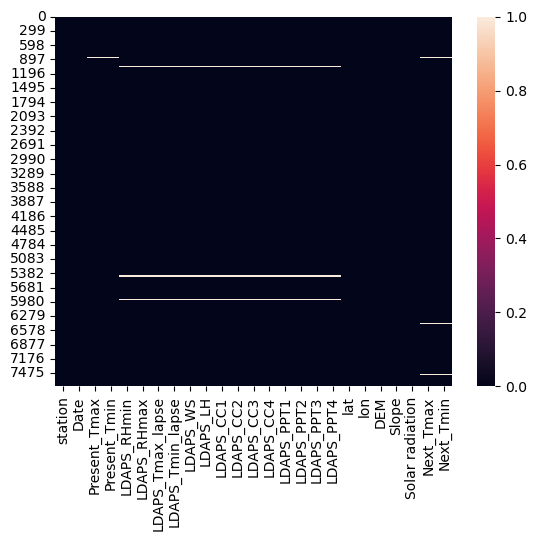

In [11]:
plt.figsize=(20,8)
sns.heatmap(df.isnull())

**We can see the Outliers as white lines in the heatmap**

**Droping the Null Values**

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

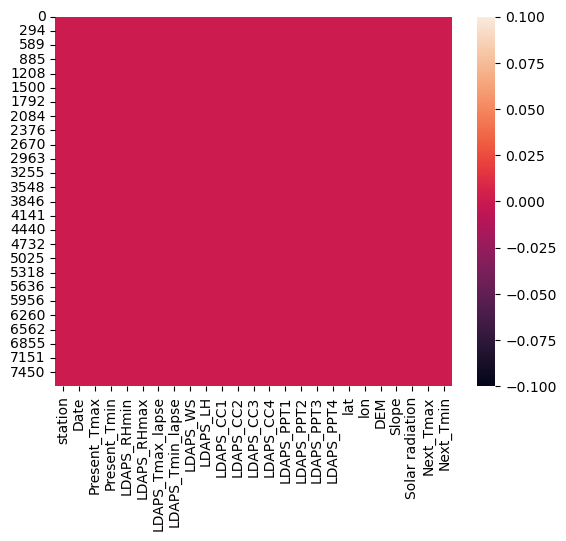

In [14]:
plt.figsize=(20,8)
sns.heatmap(df.isnull())

**We can see Null Values have been dropped**

In [15]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Multicolinearity issue is not present as difference between max and 75% quartile range is not high

## Exploratory Data Analysis and Data Visualization

In [19]:
dfcor=df.corr()

<Axes: >

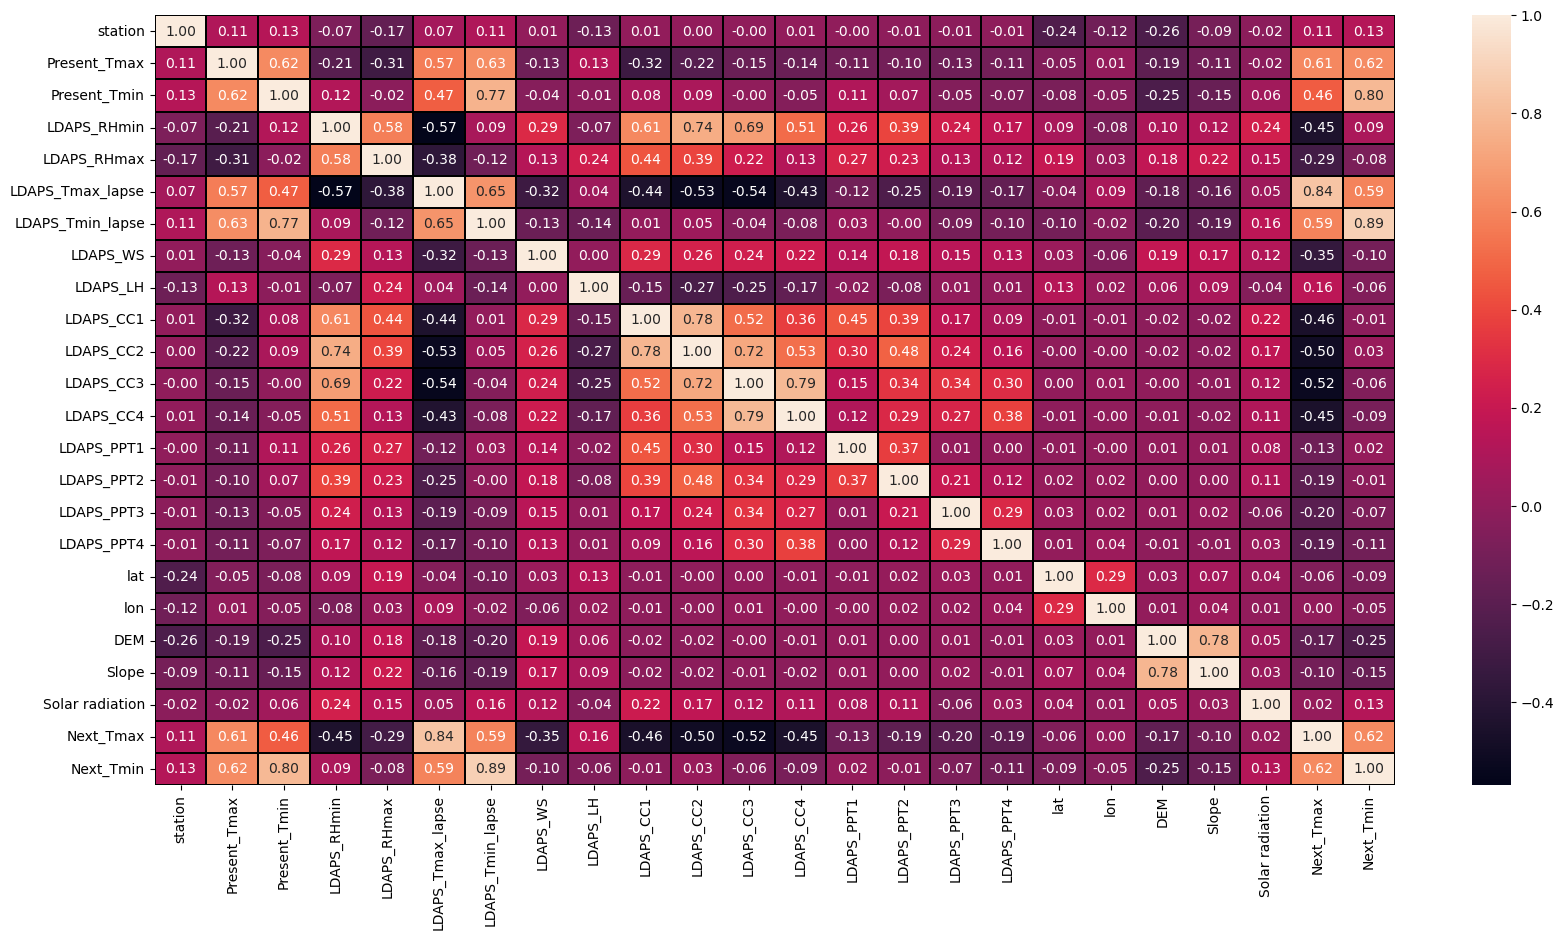

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Based on the correlation matrix , observations regarding the target variables Next_TMin and Next_Tmax:

For Next_Tmin (Next Minimum Temperature):

The variable with the highest positive correlation is LDAPS_Tmin_lapse, followed by Present_Tmin and LDAPS_RHmin.
There is a strong positive correlation between Next_Tmin and LDAPS_Tmin_lapse, indicating that the prediction of the next minimum temperature is influenced by the modeled minimum temperature using LDAPS.
There is also a moderate positive correlation between Next_Tmin and Present_Tmin, suggesting that the current minimum temperature has some influence on the prediction of the next minimum temperature.

For Next_Tmax (Next Maximum Temperature):

The variable with the highest positive correlation is LDAPS_Tmax_lapse, followed by Present_Tmax and LDAPS_Tmin_lapse.
There is a strong positive correlation between Next_Tmax and LDAPS_Tmax_lapse, indicating that the prediction of the next maximum temperature is influenced by the modeled maximum temperature using LDAPS.
There is also a moderate positive correlation between Next_Tmax and Present_Tmax, suggesting that the current maximum temperature has some influence on the prediction of the next maximum temperature.
Both Next_Tmin and Next_Tmax also show correlations with other variables like LDAPS_RHmin, LDAPS_CC1, LDAPS_CC2, and LDAPS_CC3. These correlations suggest that relative humidity and cloud cover at different layers might also have an impact on the predictions of the next minimum and maximum temperatures.

In [25]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

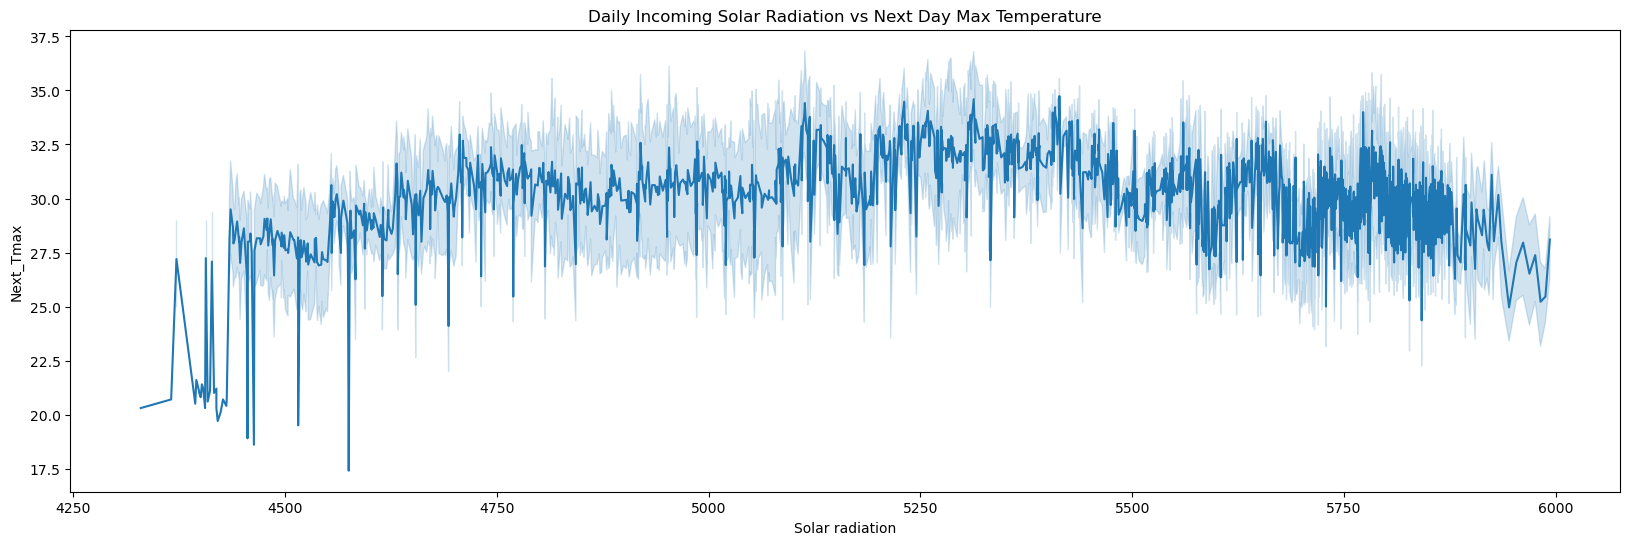

In [27]:
#Comparing Daily Solar Radiation with Next Day Max Temperature
plt.figure(figsize=(20,6))
plt.title('Daily Incoming Solar Radiation vs Next Day Max Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

We can See That Next Day Maximum Temperature is increasing 

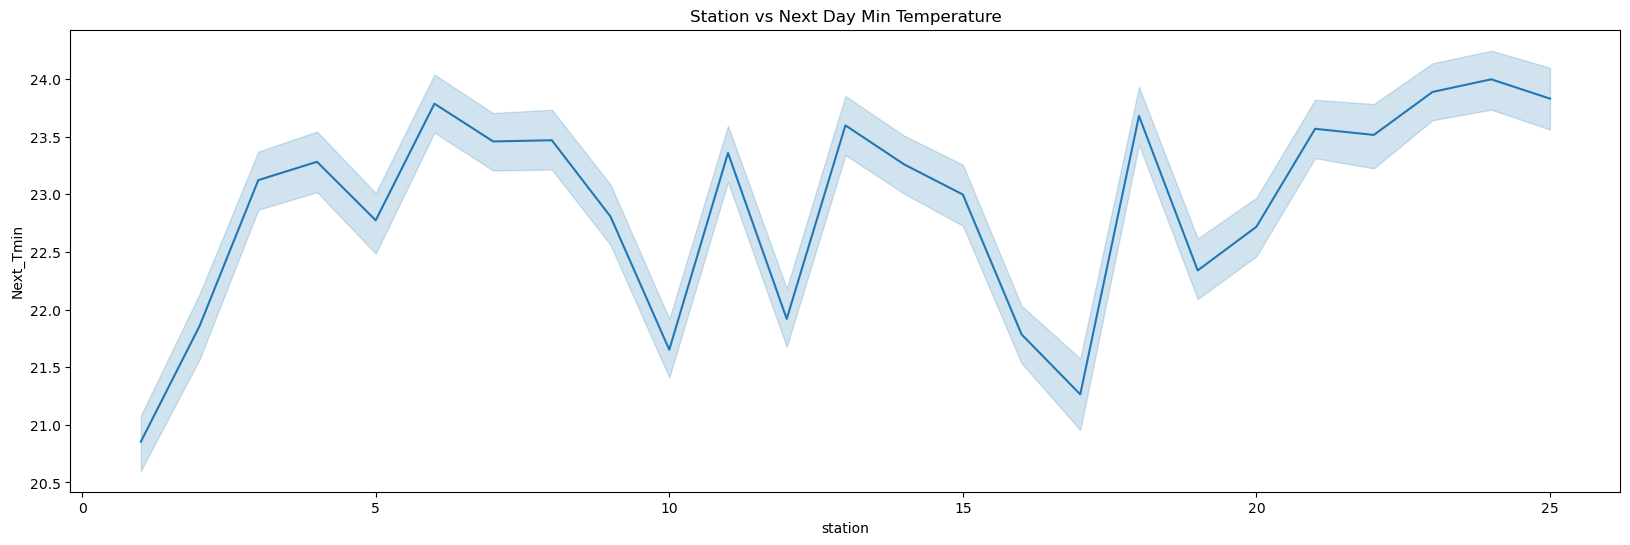

In [28]:
#Comparing weather Station with Next Day Min Temperature
plt.figure(figsize=(20,6))
plt.title('Station vs Next Day Min Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

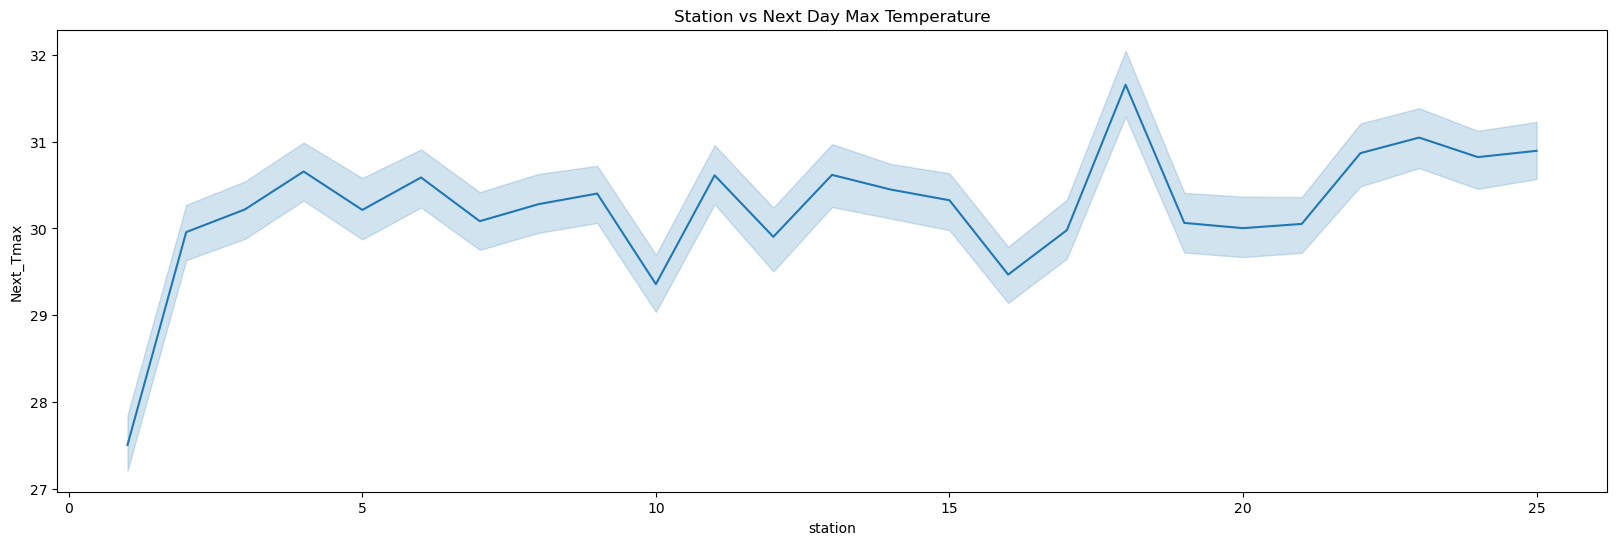

In [30]:
#Comparing weather Station with Next Day Max Temperature
plt.figure(figsize=(20,6))
plt.title('Station vs Next Day Max Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

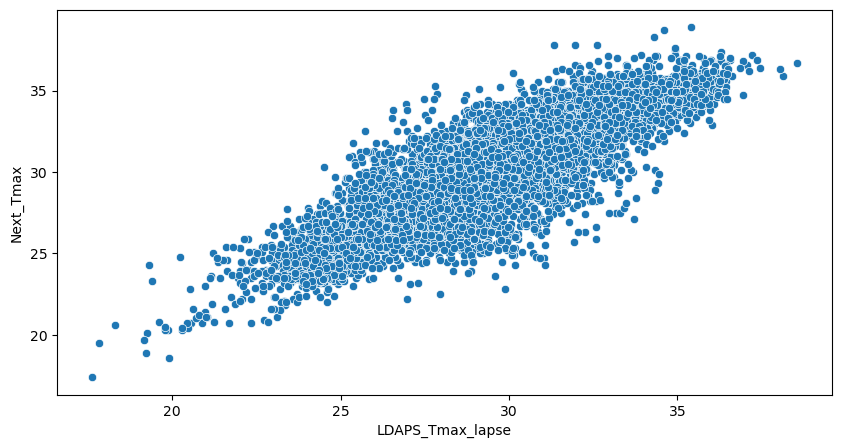

In [32]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmax')
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmax')
plt.show()

We can see Next day Temperature Increases with Increase in LDAPS_Tmax_lapse

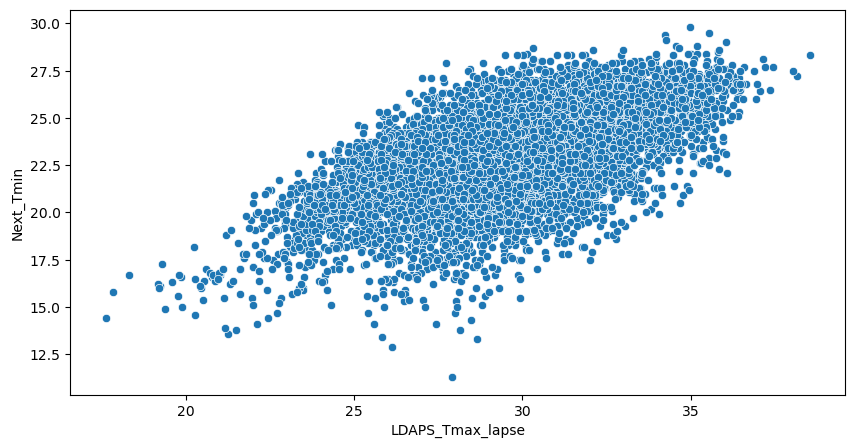

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='LDAPS_Tmax_lapse', y='Next_Tmin')
plt.xlabel('LDAPS_Tmax_lapse')
plt.ylabel('Next_Tmin')
plt.show()

We can see Next_Tmin is also showing Linear Pattern

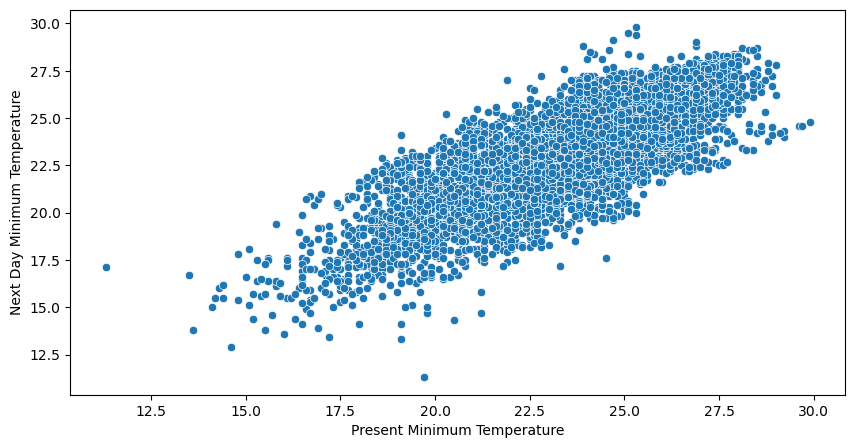

In [34]:
#Distribution between present and next day T-Min
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Present_Tmin', y='Next_Tmin')
plt.xlabel('Present Minimum Temperature')
plt.ylabel('Next Day Minimum Temperature')
plt.show()

A Logical Observation is seen that Lower the Present day T_Min lower the Next_Tmin

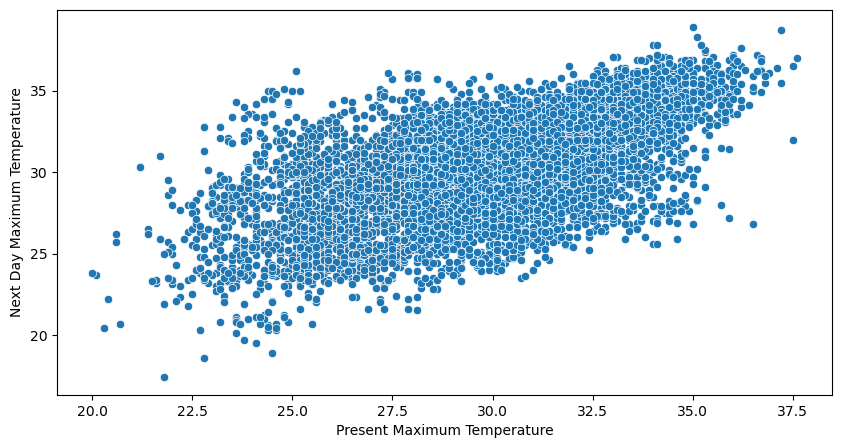

In [35]:
#Distribution between present and next day T-Min
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Present_Tmax', y='Next_Tmax')
plt.xlabel('Present Maximum Temperature')
plt.ylabel('Next Day Maximum Temperature')
plt.show()

The results are similar to the T_Min

<Axes: title={'center': 'Next Day Maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

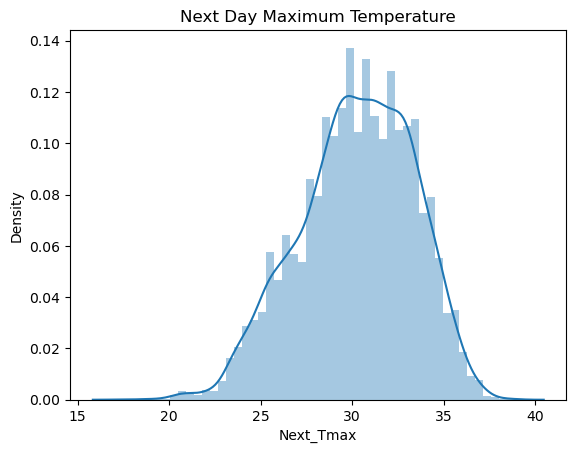

In [36]:
plt.title('Next Day Maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The Next Day Max Temperature lies between 25-37 degree 

<Axes: title={'center': 'Next Day Minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

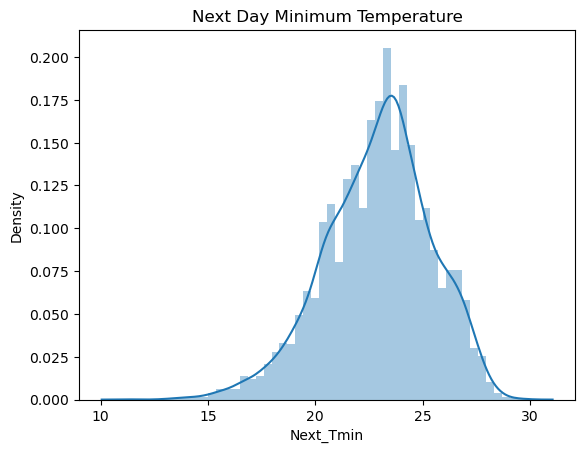

In [37]:
plt.title('Next Day Minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

The Next Day Minimum Temperature Distribution lies between 18 to 27 degree

# Handling the Only Object Column Date

In [38]:
import datetime as dt
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [39]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [40]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [42]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)
    

In [43]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


The Date Issue has been Sucessfully Handeled

# Handling Outliers

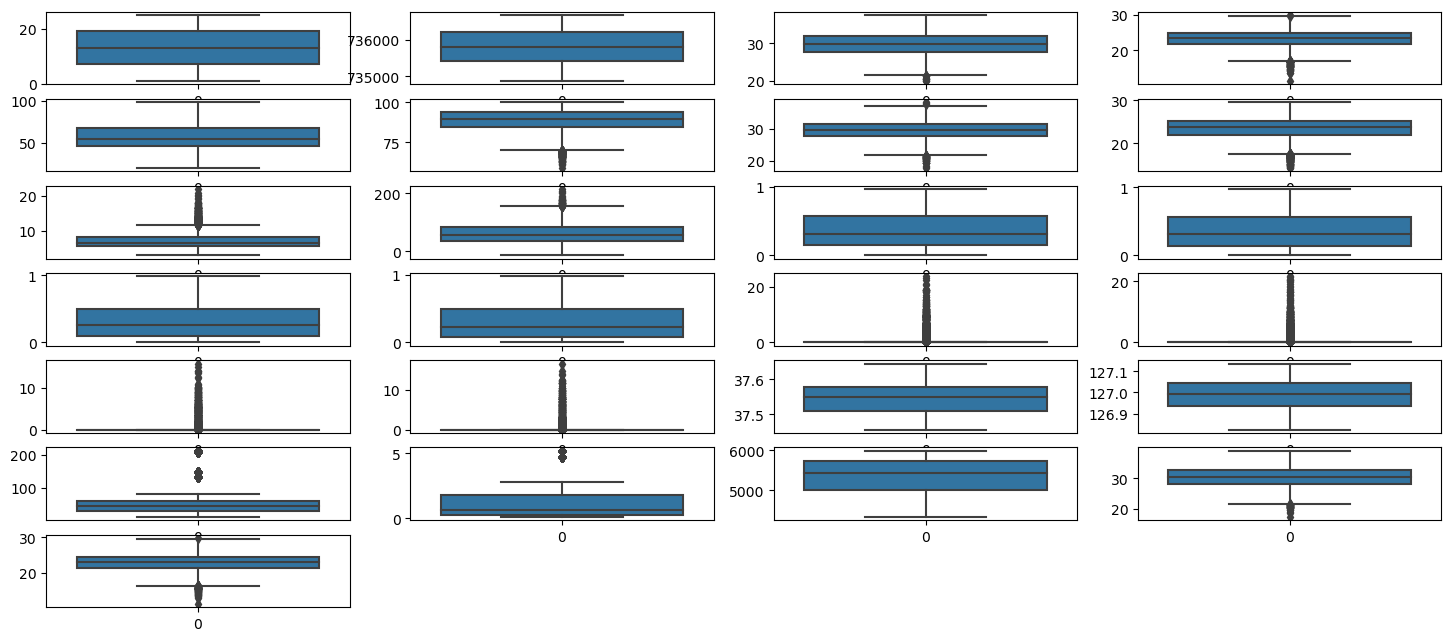

In [48]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

We can see the presence of Outliers

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 8, 15, 15, ...,  3,  3,  7], dtype=int64))


In [51]:
dfn=df[(z<3).all(axis=1)]
print('With Outliers:',df.shape)
print('Without Outliers:',dfn.shape)

With Outliers: (7588, 25)
Without Outliers: (6739, 25)


In [52]:
original_data_points = 7588
data_points_after_outliers = 6739

data_lost_percentage = ((original_data_points - data_points_after_outliers) / original_data_points) * 100

print(f"Data Lost Percentage: {data_lost_percentage:.2f}%")

Data Lost Percentage: 11.19%


In [54]:
df=dfn

In [55]:
df.shape

(6739, 25)

# Handling Skewness

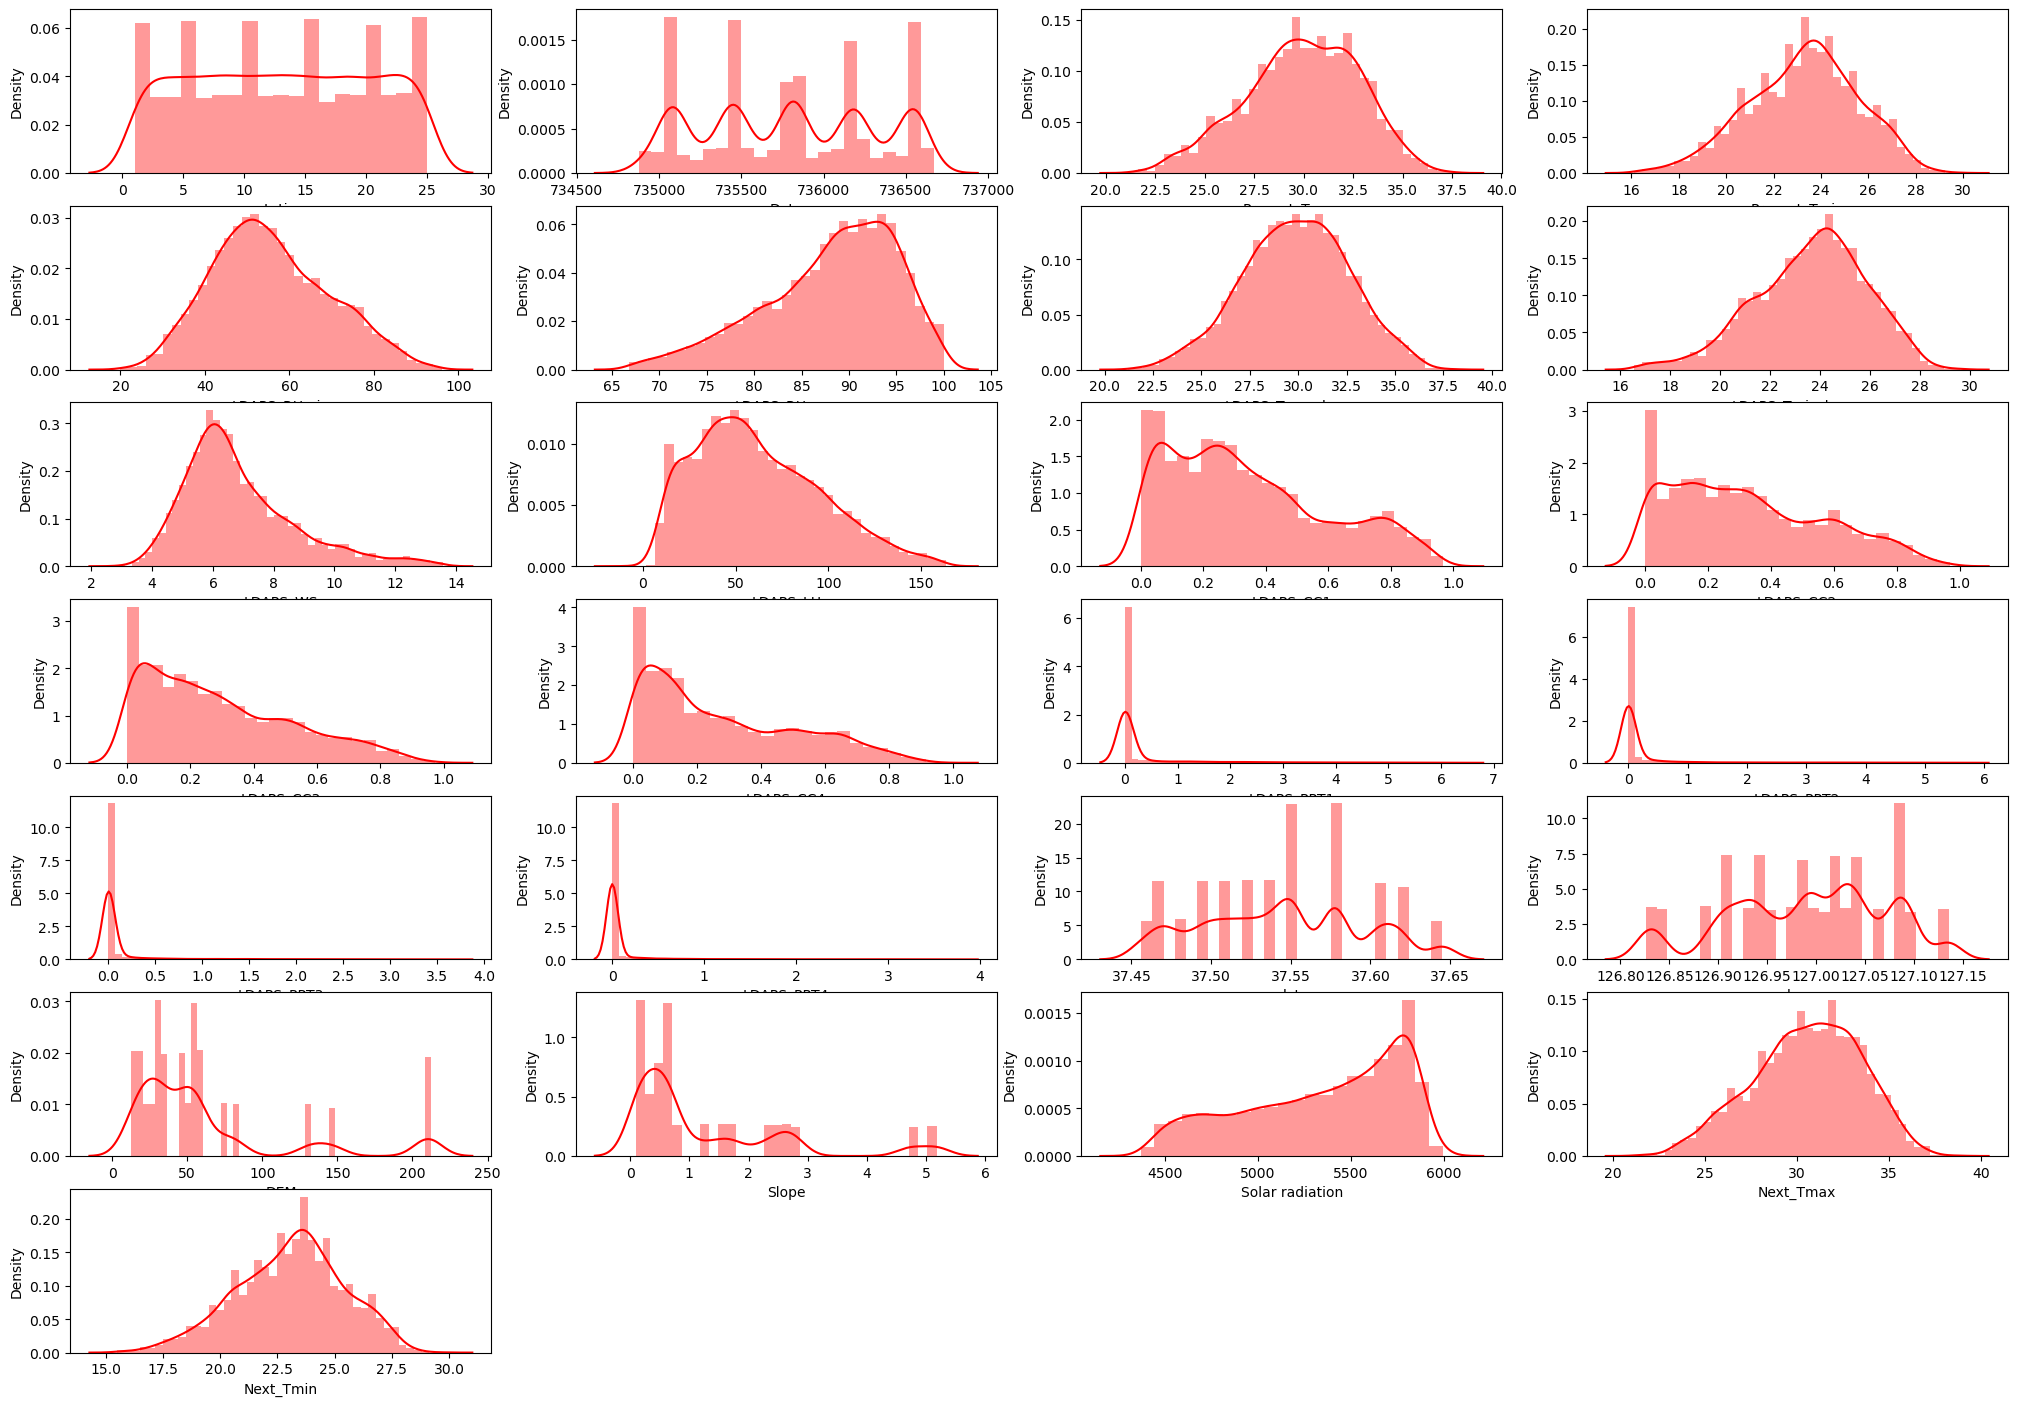

In [56]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='r')

In [57]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

Treating Skewness

In [58]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

In [59]:
df.skew()

station            -0.001594
Date                0.022610
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.065308
LDAPS_CC2           0.050023
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

The Skewness has been Handled to best possibility

# Spliting Train and test data

In [71]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

## Scaling the data

In [72]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [73]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

## Model Building

### For Predicting Max Temperature Next Day

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7823758834190631  on Random_state  815


In [75]:
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [77]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")
    print("*******************************************************************************")

*******************************************************************************
accuracy score of : LinearRegression()
R2 Score:                 0.7823758834190631
Mean Absolute Error:      1.0574369759137328
Mean Squared error:       1.8980803418878318
Root Mean Squared Error:  1.3777083660513323
[0.61048465 0.73342953 0.64933075 0.68200722 0.68627828 0.69875056
 0.78672242 0.56762198]
cross validation score:   0.676828171711191
Difference between R2 score and cross validatio score is :   0.10554771170787203
*******************************************************************************
*******************************************************************************
accuracy score of : RandomForestRegressor()
R2 Score:                 0.8972244240446088
Mean Absolute Error:      0.7138278931750742
Mean Squared error:       0.8963910039564787
Root Mean Squared Error:  0.9467792794292019
[0.64727933 0.73303474 0.60736053 0.60636457 0.68559365 0.66437951
 0.75731507 0.57230942]
cross vali

## Hyper Parameter Tuning 

In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' :[0,10,20],
              'random_state':[15,16,17],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Rd=Ridge()

clf = GridSearchCV(Ridge(),parameters, cv=5)
clf.fit(x_train,y1_train)
clf.best_params_

{'max_iter': 20, 'random_state': 17, 'solver': 'sag'}

In [79]:
clf_pred=clf.best_estimator_.predict(x_test)

In [80]:
r2_score(y1_test, clf_pred)

0.782177344416543

## Saving the Model

In [81]:
import pickle
filename='Max_temp.pickle'
pickle.dump(Rd,open(filename,'wb'))

In [84]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmax.obj")
RF_from_joblib=joblib.load('Temperature_Tmax.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([27.58406659, 25.9401642 , 33.10528087, ..., 27.3845683 ,
       30.89449504, 31.90713138])

In [85]:
pd.set_option("display.max_rows",None,"display.max_columns",None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

## For Predicting Minimum Temperature Next Day

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.839939088299291  on Random_state  152


In [87]:
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [88]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.839939088299291
Mean Absolute Error:      0.7604827886938489
Mean Squared error:       0.9141947327713035
Root Mean Squared Error:  0.9561353109112243
[0.61836676 0.80606344 0.65668161 0.78965708 0.80528942 0.8092919
 0.83715727 0.84370258]
cross validation score:   0.7707762561725278
Difference between R2 score and cross validatio score is -  0.06916283212676322
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.910749112142023
Mean Absolute Error:      0.5493578635014839
Mean Squared error:       0.5097602575667659
Root Mean Squared Error:  0.7139749698461185
[0.56270374 0.81322773 0.68215905 0.79843457 0.79781766 0.83047074
 0.85086713 0.86133733]
cross validation score:   0.7746272439402249
Difference between R2 score and cross validati

## Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept' :[True],
             'n_jobs':[-1]}
LR=LinearRegression()

clf = GridSearchCV(LinearRegression(),parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_

{'fit_intercept': True, 'n_jobs': -1}

In [90]:
clf_pred=clf.best_estimator_.predict(x_test)

In [91]:
r2_score(y2_test, clf_pred)

0.839939088299291

## Saving the Model

In [92]:
import joblib
joblib.dump(clf.best_estimator_,"Temperature_Tmin.obj")
RF_from_joblib=joblib.load('Temperature_Tmin.obj')
Predicted = RF_from_joblib.predict(x_test)
Predicted

array([24.31451716, 23.42255792, 22.4590196 , ..., 26.41928131,
       25.47636032, 24.58837506])

In [93]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

## Conclusion

**We can conclude that we have built Next Day Max Temperature Model with 78% Understanding of Data
and we have built Next Day Minimum Temperature Model with 83% Understaning of Data**